In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
pd.set_option('max_colwidth', 20000)

In [0]:
os.chdir('/run/media/cbib/Bionano/My_imac/TNT/')
os.getcwd()

'/run/media/cbib/Bionano/My_imac/TNT'

In [0]:
ls

Aligments/                       JCJR2.nsq
cds_comp.png                     JCJR2.tab
gammaproteobacteria_odb9.tar.gz  _~lock.tnt_report1(1).odt#
JCJR/                            _~lock.tnt_report1.odt#
JCJR12/                          _~lock.tnt_report_september2018_jlm(1).doc#
JCJR12.fasta                     _~lock.tnt_report_september2018_jlm.doc#
JCJR12.nhr                       nucmer.sh
JCJR12.nin                       number_nitro-OYEs.ods
JCJR12.nog                       Phaster/
JCJR12.nsd                       pseudo_sp_vs_mandeleii.delta
JCJR12.nsi                       pseudo_sp_vs_mandeleii.dot.coords
JCJR12.nsq                       pseudo_sp_vs_mandeleii.dot.coords.idx
JCJR12.phaster                   pseudo_xenb.fasta
JCJR12.tab                       test_status
JCJR2/                           tnt_report1.odt
JCJR2.fasta                      tnt_report_september2018_jlm.doc
JCJR2.nhr                        xenb_jcjr12.fasta
JCJR2.nin                        xenb_jcjr2.

In [0]:
%%bash
cat XenBs_angi.fasta

>AAF02539.1 xenobiotic reductase B [Pseudomonas fluorescens]
MTTIFDPITLGELQLSNRIIMAPLTRCRADEGRVPNAMMAEYYVQRASAGLIISEATSITPMGVGYPDTPGIWSNDQVRGWSNITKAVHGAGGKIVLQLWHVGRISHPSYLNDEAPVAPSAVKPEGHVSLVRPLADYVTPRALELEEIADVVDAYRVGAENAKAAGFDGVEIHGANGYLLDQFLQTSTNQRTDQYGGSVENRARLMIEVVDAAIEIWGAGRVGLHLSPRADLHDMGDANLSETFNYVATEMGKRGIAFICAREREAGDSIGPQLKKAFGGAYIANEKFTKETANAWLANGSADAVAFGVPFIANPDLPARLKLDAELNAPHPETFYAKGPVGYIDYPAL
>AAF02539.1_caract xenobiotic reductase B [Pseudomonas fluorescens] caract
MTTIFDPIKLGDIELANRIIMAPLTRCRADEGRVPNALMAEYYVQRASAGLILSEATSVTPMGVGYPDTPGIWSNDQVRGWANVTKAIHGAGGKIFLQLWHVGRVSHESYLNGEAPVAPSAIQPKGHVSLVRPLSDYPTPRALETAEIADIVDAYRTGAENAKAAGFDGVEIHGANGYLLDQFLQSSTNQRTDNYGGSLENRARLLLEVTDAAIEVWGAGRVGVHLSPRADSHDMGDDNLAETFTYVARELGKRGIAFICSREKEAGDSLGPQLKEAFGGPYIVNERFTKDSANAWLASGKADAVAFGVPFIANPDLPARLKADAPLNEARPELFYAKGPVGYIDYPVM


In [0]:
def Read_blast(blast_tab):
    blast_table = pd.read_table(blast_tab, comment="#", names=['QAcc', 'SubAcc',
    'PercIdent', 'AlignLen', 'NumMis','NumGaps',
    'QStart', 'QStop', 'SubStart', 'SubEnd', 'Evalue',
    'Bitscore'])
    
    return blast_table


In [0]:
%%bash
makeblastdb -in 'JCJR2.fasta' -parse_seqids -dbtype nucl -title JCJR2 -out JCJR2
tblastn -query XenBs_angi.fasta -db  JCJR2 -evalue 1e-20 -outfmt 7 > JCJR2.tab



Building a new DB, current time: 10/25/2018 10:09:58
New DB name:   /run/media/cbib/Bionano/My_imac/TNT/JCJR2
New DB title:  JCJR2
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /run/media/cbib/Bionano/My_imac/TNT/JCJR2
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 160 sequences in 0.304113 seconds.


In [0]:
blast_jcjr2 = Read_blast("JCJR2.tab")
blast_jcjr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
QAcc         21 non-null object
SubAcc       21 non-null object
PercIdent    21 non-null float64
AlignLen     21 non-null int64
NumMis       21 non-null int64
NumGaps      21 non-null int64
QStart       21 non-null int64
QStop        21 non-null int64
SubStart     21 non-null int64
SubEnd       21 non-null int64
Evalue       21 non-null float64
Bitscore     21 non-null float64
dtypes: float64(3), int64(7), object(2)
memory usage: 2.0+ KB


In [0]:
blast_jcjr2.head()

,QAcc,SubAcc,PercIdent,AlignLen,NumMis,NumGaps,QStart,QStop,SubStart,SubEnd,Evalue,Bitscore
0,AAF02539.1,contig_27,100.000,349,0,0,1,349,89275,90321,0.000000e+00,717.0
1,AAF02539.1,contig_3,49.860,357,166,3,3,349,252391,253452,1.260000e-102,329.0
2,AAF02539.1,contig_1,48.324,358,171,5,2,347,487168,486101,1.110000e-100,323.0
3,AAF02539.1,contig_1,30.870,230,138,4,1,217,443870,444535,2.790000e-27,111.0
4,AAF02539.1,contig_1,30.030,333,195,12,1,315,496780,495842,7.020000e-25,103.0


In [0]:
from IPython.display import HTML 
HTML(blast_jcjr2.to_html(index=False))

QAcc,SubAcc,PercIdent,AlignLen,NumMis,NumGaps,QStart,QStop,SubStart,SubEnd,Evalue,Bitscore
AAF02539.1,contig_27,100.000,349,0,0,1,349,89275,90321,0.000000e+00,717.0
AAF02539.1,contig_3,49.860,357,166,3,3,349,252391,253452,1.260000e-102,329.0
AAF02539.1,contig_1,48.324,358,171,5,2,347,487168,486101,1.110000e-100,323.0
AAF02539.1,contig_1,30.870,230,138,4,1,217,443870,444535,2.790000e-27,111.0
AAF02539.1,contig_1,30.030,333,195,12,1,315,496780,495842,7.020000e-25,103.0
AAF02539.1,contig_30,41.972,355,196,5,1,346,54155,55216,1.080000e-74,248.0
AAF02539.1,contig_14,42.466,219,106,5,1,212,9126,9743,2.890000e-48,172.0
AAF02539.1,contig_44,30.606,330,198,8,4,317,3091,4035,1.650000e-32,126.0
AAF02539.1,contig_4,33.476,233,127,5,1,217,195359,194697,2.030000e-29,117.0
AAF02539.1,contig_15,30.233,215,133,5,4,212,121086,121697,2.220000e-25,105.0


In [0]:
blast_jcjr2_sorted = blast_jcjr2.sort_values(by='PercIdent', ascending=False)
blast_jcjr2_sorted.head()

,QAcc,SubAcc,PercIdent,AlignLen,NumMis,NumGaps,QStart,QStop,SubStart,SubEnd,Evalue,Bitscore
0,AAF02539.1,contig_27,100.000,349,0,0,1,349,89275,90321,0.000000e+00,717.0
10,AAF02539.1_caract,contig_27,83.668,349,57,0,1,349,89275,90321,0.000000e+00,627.0
11,AAF02539.1_caract,contig_1,50.278,360,163,5,2,348,487168,486098,4.540000e-102,327.0
1,AAF02539.1,contig_3,49.860,357,166,3,3,349,252391,253452,1.260000e-102,329.0
15,AAF02539.1_caract,contig_3,49.860,357,166,3,3,349,252391,253452,1.400000e-101,326.0


In [0]:
HTML(blast_jcjr2_sorted.to_html(index=False))

QAcc,SubAcc,PercIdent,AlignLen,NumMis,NumGaps,QStart,QStop,SubStart,SubEnd,Evalue,Bitscore
AAF02539.1,contig_27,100.000,349,0,0,1,349,89275,90321,0.000000e+00,717.0
AAF02539.1_caract,contig_27,83.668,349,57,0,1,349,89275,90321,0.000000e+00,627.0
AAF02539.1_caract,contig_1,50.278,360,163,5,2,348,487168,486098,4.540000e-102,327.0
AAF02539.1,contig_3,49.860,357,166,3,3,349,252391,253452,1.260000e-102,329.0
AAF02539.1_caract,contig_3,49.860,357,166,3,3,349,252391,253452,1.400000e-101,326.0
AAF02539.1,contig_1,48.324,358,171,5,2,347,487168,486101,1.110000e-100,323.0
AAF02539.1,contig_14,42.466,219,106,5,1,212,9126,9743,2.890000e-48,172.0
AAF02539.1,contig_30,41.972,355,196,5,1,346,54155,55216,1.080000e-74,248.0
AAF02539.1_caract,contig_30,41.972,355,196,5,1,346,54155,55216,1.660000e-75,251.0
AAF02539.1_caract,contig_14,39.726,219,112,5,1,212,9126,9743,1.320000e-44,162.0


In [0]:
from Bio import SeqIO
from Bio.Alphabet import generic_dna
from Bio.Alphabet import IUPAC

jcjr2_nuc = 'JCJR2.fasta'

for seq_record in SeqIO.parse(jcjr2_nuc, "fasta", IUPAC.unambiguous_dna):
    if seq_record.id == 'contig_27':
        seq = seq_record

print(seq)

ID: contig_27
Name: contig_27
Description: contig_27
Number of features: 0
Seq('TCCAGCCGTTTGCTGGCGTCTTTCTCGTAGAAAGCCAGGCGTTGGGTCGAAGGA...GTC', IUPACUnambiguousDNA())


### From blast output, `SubjectStart`	`SubjectEnd`
 **89275 : 90321**

In [0]:
seq[89274:90321].translate()

SeqRecord(seq=Seq('MTTIFDPITLGELQLSNRIIMAPLTRCRADEGRVPNAMMAEYYVQRASAGLIIS...PAL', IUPACProtein()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

This is the same sequence as `>AAF02539.1 xenobiotic reductase`

The end of the seq

In [0]:
seq[90300:90321].translate()

SeqRecord(seq=Seq('YIDYPAL', IUPACProtein()), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [0]:
def Fastd_to_pandas(gff_file):
    '''Takes a gff file from `FASTD` and converts it to a pandas data frame with every column named
    as the GFF3 specification. It cleans the rows that have Nans in the `source` column (fasta sequences are appended 
    to the end of the file).  
    Input: GFF file name (full path expected)
    Output: Pandas Dataframe'''
    
    import pandas as pd
    
    col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    gff_pd = pd.read_csv(gff_file, sep='\t', low_memory=False, comment='#', header=None, names=col_names)    
    gff_pd = gff_pd[~gff_pd['source'].isnull()]

    return gff_pd


def Unique_types_sources(gff_file):
    '''Takes a gff dataframe and prints the unique types to the stdout'''
    
    pd_dataframe = Fastd_to_pandas(gff_file)
    print('Unique types', pd_dataframe['type'].unique())
    print('Unique sources', pd_dataframe['source'].unique())
    
    return ""

def Anot_by_annotators(gff_file):
    '''Prints the number of annotation made by each software (annotator)'''
    
    df = Fastd_to_pandas(gff_file)
    sources = df['source'].unique()

    for source in sources:# Nans not included
        print(f'Number of entries from {source} ==>', df[df['source'] == source].shape[0])  

In [0]:
def Type_counts(*gff_files, **species):    
    
    '''Returns the counts of each feature type (column named "type"). Names every column 
    with the specie name.
    Input: A list of file names *args and keyword args with the specia names. Order of keywords 
    matters, use the same as the list of gff_files
    Output: A data frame with type counts for each gff file'''
    
    import pandas as pd
    
    gff_files = gff_files
    
    gffs_pds = [Fastd_to_pandas(gff_file) for gff_file in gff_files]
    gffs_value_counts = [df["type"].value_counts() for df in gffs_pds]
    type_counts = pd.concat(gffs_value_counts, axis=1, sort=True)
    
    col_names = species
    type_counts.columns = col_names.values()
    return type_counts

In [0]:
def Most_common_products(gff_file, n=10, position_string=1, name_to_replace='product='):
    '''Takes in a dfast gff_file and pprints the n most common products.
    
    Input: gff_file, n (integer) which represents the number of top elements and position_string tells position
    of the product qualifier.
    
    output: Prints to stdout the products and returns a counter dic with the  most 
    common products'''

    from pprint import pprint
    from collections import Counter
    
    pd = Fastd_to_pandas(gff_file)
    attribute_product= pd.iloc[: , 8].str.split(";").str[position_string]
    attribute_product= attribute_product.str.replace(name_to_replace, "")
    
    attribute_prod_dic = Counter()
    for element in attribute_product:
        attribute_prod_dic[element] += 1

    pprint(attribute_prod_dic.most_common()[:n])
    
    return attribute_prod_dic

In [0]:
def CDS_composition(*gff_files, ec_number_string ="EC_number",uniprot="UniProtKB", COG="COG", **species_names):
    '''Takes a list of GFF files, splits the attribute column (the last one) and returns it'''
    
    gff_files = gff_files
    species = species_names.values()
    
    attributes_dic_list = []
    attributes_dic = {}
   
    product_types = [ec_number_string, uniprot, COG] 
    gffs_pds = [Fastd_to_pandas(gff_file)["attributes"] for gff_file in gff_files]
    
    for df in gffs_pds:
        gffs_attr_counts = {product_type : df.str.contains(product_type).sum() for product_type in product_types}
        attributes_dic_list.append(gffs_attr_counts)
        gffs_attr_counts = {}
    #print(type(attributes_dic_list),attributes_dic_list)
    
    df_attributes = pd.DataFrame(attributes_dic_list, index=species)
        

    return round(df_attributes / gffs_pds[0].shape[0] * 100, 3)


In [0]:
def Searching_atts(gff_file, patterns, dfast=True):
    '''Takes the attributes column, replaces the translation string if dfast=True, 
    the default (for prokka set it to False) and then searches for a list
    of patterns returning the number of ocurrences and indexes of each one
    
    input: list of patterns
    output: dictionary of each pattern and its indexes as a list of values'''
    
    import re
    from collections import defaultdict


    df = Fastd_to_pandas(gff_file)
    if dfast:
        atts = df.iloc[: , 8].str.replace("translation=[A-Z]+;", "")
        red_genes_locs = defaultdict()
    else:
        atts = df.iloc[: , 8]
        red_genes_locs = defaultdict()
    for red in potential_reds:
        #print(red, atts[atts.str.contains(red, flags=re.I)].shape)
        #print(atts[atts.str.contains(red, flags=re.I)].index, end="\n\n")
        red_genes_locs[red] = atts[atts.str.contains(red, flags=re.I)].index
    
    return(red_genes_locs)
    
        
potential_reds = ["nitroreductase", 'aldehyde.+oxidase', "amide.+dehydrogenase",\
                      "diaphorase","hydrogenase", "xanthine.+oxidase",\
                      "cytochrome.+reductase", "xen[A-Z]", 'PETN', "oxidoreductase",\
                      "xenobiotic", "OYE", "PETN", "flavin oxidoreductase", "nitro", 
                      "COG1902", "COG0778", "old yellow"]


In [0]:
pwd

'/run/media/cbib/Bionano/My_imac/TNT'

In [0]:
#paths
JCJR2_path = 'JCJR2/Rastk/6666666.367937.gff'
JCJR12_path = 'JCJR12/Rastk/6666666.367945.gff'

In [0]:
JCJR2_df = Fastd_to_pandas(JCJR2_path)
JCJR12_df = Fastd_to_pandas(JCJR12_path)
JCJR2_df.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,contig_1,FIG,CDS,1,63,.,-,1,ID=fig|6666666.367937.peg.1;Name=hypothetical protein
1,contig_1,FIG,CDS,785,2413,.,+,2,ID=fig|6666666.367937.peg.2;Name=hypothetical protein
2,contig_1,FIG,CDS,2425,4047,.,-,1,ID=fig|6666666.367937.peg.3;Name=Methyl-accepting chemotaxis sensor/transducer protein
3,contig_1,FIG,CDS,4324,5280,.,-,1,ID=fig|6666666.367937.peg.4;Name=Uncharacterized methyltransferase PA1407
4,contig_1,FIG,CDS,5342,6271,.,-,2,ID=fig|6666666.367937.peg.5;Name=Auxin efflux carrier family protein


In [0]:
JCJR12_df.iloc[25,8]

'ID=fig|6666666.367945.peg.26;Name=Bifunctional protein: zinc-containing alcohol dehydrogenase%3B quinone oxidoreductase ( NADPH:quinone reductase) (EC 1.1.1.-)%3B Similar to arginate lyase;Ontology_term=KEGG_ENZYME:1.1.1.-'

### Is the blast hit annotated as a old yellow enzime (XENB)
 **89275 : 90321**

In [0]:
HTML(blast_jcjr2.to_html(index=False))

In [0]:
HTML(JCJR2_df[(JCJR2_df['seqid'] == 'contig_27') & (JCJR2_df['start'] > 8500)].to_html(index=False))

seqid,source,type,start,end,score,strand,phase,attributes
contig_27,FIG,CDS,8531,9856,.,+,2,ID=fig|6666666.367937.peg.3243;Name=Dicarboxylate MFS transporter
contig_27,FIG,CDS,9948,10061,.,+,0,ID=fig|6666666.367937.peg.3244;Name=hypothetical protein
contig_27,FIG,CDS,10260,10580,.,-,0,ID=fig|6666666.367937.peg.3245;Name=hypothetical protein
contig_27,FIG,CDS,10753,11376,.,+,1,ID=fig|6666666.367937.peg.3246;Name=Flavin reductase-like%2C FMN-binding domain protein
contig_27,FIG,CDS,11391,11630,.,-,0,ID=fig|6666666.367937.peg.3247;Name=hypothetical protein
contig_27,FIG,CDS,11695,12036,.,-,1,ID=fig|6666666.367937.peg.3248;Name=hypothetical protein
contig_27,FIG,CDS,12360,13289,.,+,0,ID=fig|6666666.367937.peg.3249;Name=Transcriptional regulator%2C AraC family
contig_27,FIG,CDS,13302,14357,.,-,0,ID=fig|6666666.367937.peg.3250;Name=Spermidine Putrescine transport ATP-binding protein potA
contig_27,FIG,CDS,14381,15238,.,-,2,ID=fig|6666666.367937.peg.3251;Name=ABC transporter%2C permease protein 2 (cluster 1%2C maltose/g3p/polyamine/iron)
contig_27,FIG,CDS,15235,16143,.,-,1,ID=fig|6666666.367937.peg.3252;Name=ABC transporter%2C permease protein 1 (cluster 1%2C maltose/g3p/polyamine/iron)


En este caso esta anotada como `Dicarboxylate MFS transporter`, un gen de alrededor de 1500 nucleotidos, que cubre la region donde esta codificada XENB, mostrando la importancia de buscar la secuencia objetivo si es que se posee una, pues la anotacion de genomas tiene casos como este, donde se entrega un resultado probablemente correcto pero que no es exhaustivo, no incluye todos los genes que cubren una region en este caso donde mas de un gen se podrian solapar. 

# Para JCJR12

In [0]:
%%bash
makeblastdb -in 'JCJR12.fasta' -parse_seqids -dbtype nucl -title JCJR12 -out JCJR12
tblastn -query XenBs_angi.fasta -db  JCJR12 -evalue 1e-20 -outfmt 7 > JCJR12.tab



Building a new DB, current time: 10/25/2018 11:30:03
New DB name:   /run/media/cbib/Bionano/My_imac/TNT/JCJR12
New DB title:  JCJR12
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /run/media/cbib/Bionano/My_imac/TNT/JCJR12
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 301 sequences in 0.114706 seconds.


In [0]:
blast_jcjr12 = Read_blast("JCJR12.tab")
blast_jcjr12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 12 columns):
QAcc         23 non-null object
SubAcc       23 non-null object
PercIdent    23 non-null float64
AlignLen     23 non-null int64
NumMis       23 non-null int64
NumGaps      23 non-null int64
QStart       23 non-null int64
QStop        23 non-null int64
SubStart     23 non-null int64
SubEnd       23 non-null int64
Evalue       23 non-null float64
Bitscore     23 non-null float64
dtypes: float64(3), int64(7), object(2)
memory usage: 2.2+ KB


In [0]:
blast_jcjr12.head()

,QueryAccession,SubjectAccession,PercentIdentity,AlignmentLength,NumberMismatch,NumberGaps,QueryStart,QueryStop,SubjectStart,SubjectEnd,Evalue,Bitscore
0,AAF02539.1,contig7|mandelii,83.668,349,57,0,1,349,294526,293480,0.000000e+00,627.0
1,AAF02539.1,contig7|mandelii,36.564,227,128,7,1,217,53737,54399,6.520000e-33,127.0
2,AAF02539.1,contig10|mandelii,44.904,363,175,8,11,348,34332,35420,6.100000e-85,278.0
3,AAF02539.1,contig10|mandelii,40.650,369,198,5,1,348,217868,216762,9.800000e-81,266.0
4,AAF02539.1,contig10|mandelii,31.739,230,136,3,1,217,213799,213134,5.600000e-33,128.0


In [0]:
from IPython.display import HTML 
HTML(blast_jcjr12.sort_values(by='PercIdent', ascending=False).to_html(index=False))

QAcc,SubAcc,PercIdent,AlignLen,NumMis,NumGaps,QStart,QStop,SubStart,SubEnd,Evalue,Bitscore
AAF02539.1_caract,contig7|mandelii,100.000,349,0,0,1,349,294526,293480,0.000000e+00,715.0
AAF02539.1,contig7|mandelii,83.668,349,57,0,1,349,294526,293480,0.000000e+00,627.0
AAF02539.1_caract,contig10|mandelii,47.514,362,165,8,11,347,34332,35417,1.390000e-88,289.0
AAF02539.1_caract,contig2|mandelii,45.225,356,183,6,1,347,861646,860588,5.440000e-84,275.0
AAF02539.1,contig10|mandelii,44.904,363,175,8,11,348,34332,35420,6.100000e-85,278.0
AAF02539.1,contig2|mandelii,44.382,356,188,6,1,348,861646,860585,7.170000e-82,269.0
AAF02539.1_caract,contig10|mandelii,44.054,370,182,6,1,347,217868,216765,6.860000e-88,286.0
AAF02539.1_caract,contig6|mandelii,42.547,369,191,5,1,348,354919,356025,4.540000e-86,281.0
AAF02539.1,contig6|mandelii,41.014,217,112,5,1,212,114397,113780,1.090000e-41,153.0
AAF02539.1,contig6|mandelii,40.761,368,197,5,1,347,354919,356022,1.600000e-80,265.0


In [0]:
from Bio import SeqIO
from Bio.Alphabet import generic_dna
from Bio.Alphabet import IUPAC

jcjr2_nuc = 'JCJR12.fasta'

for seq_record in SeqIO.parse(jcjr2_nuc, "fasta", IUPAC.unambiguous_dna):
    if seq_record.id == 'contig7|mandelii':
        seq = seq_record

print(seq)

ID: contig7|mandelii
Name: contig7|mandelii
Description: contig7|mandelii
Number of features: 0
Seq('CGACCTGATCGACTACCGACAATTTAAAGGTCAGCGTGTAGTCTCGCTGACTAC...TTC', IUPACUnambiguousDNA())


**The start is larger than the end so it aligns with the complement strand**
https://www.biostars.org/p/17688/

In [0]:
print(len(seq.seq))
294526-293480

414749


1046

### From blast output, `SubjectStart`	`SubjectEnd`
 **294526 -	293480**

## Always slice first and then `reverse_complement()`

In [0]:
xenb_caract = seq.seq[293481:294526].reverse_complement().translate()
xenb_caract

/home/cbib/miniconda3/envs/bif/lib/python3.6/site-packages/Bio/Seq.py:2576: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Seq('MTTIFDPIKLGDIELANRIIMAPLTRCRADEGRVPNALMAEYYVQRASAGLILS...YPV', IUPACProtein())

This is the same sequence as `>AAF02539.1_carac xenobiotic reductase`

In [0]:
JCJR12_df.iloc[25,8]

'ID=fig|6666666.367945.peg.26;Name=Bifunctional protein: zinc-containing alcohol dehydrogenase%3B quinone oxidoreductase ( NADPH:quinone reductase) (EC 1.1.1.-)%3B Similar to arginate lyase;Ontology_term=KEGG_ENZYME:1.1.1.-'

### Is the blast hit annotated as a old yellow enzime (XENB)

In [0]:
JCJR12_df[(JCJR12_df['seqid'] == 'contig7|mandelii') & (JCJR12_df['start'] > 293000)]

,seqid,source,type,start,end,score,strand,phase,attributes
5821,contig7|mandelii,FIG,CDS,293477,294526,.,-,2,ID=fig|6666666.367945.peg.5822;Name=N-ethylmaleimide reductase (EC 1.-.-.-);Ontology_term=KEGG_ENZYME:1.-.-.-
5822,contig7|mandelii,FIG,CDS,294550,295716,.,-,1,ID=fig|6666666.367945.peg.5823;Name=Uncharacterized MFS-type transporter
5823,contig7|mandelii,FIG,CDS,295720,296040,.,-,1,ID=fig|6666666.367945.peg.5824;Name=Transcriptional regulator%2C ArsR family
5824,contig7|mandelii,FIG,CDS,296212,296790,.,+,1,ID=fig|6666666.367945.peg.5825;Name=Acyl carrier protein phosphodiesterase (EC 3.1.4.14);Ontology_term=KEGG_ENZYME:3.1.4.14
5825,contig7|mandelii,FIG,CDS,296916,297707,.,-,0,ID=fig|6666666.367945.peg.5826;Name=Acyl-CoA:1-acyl-sn-glycerol-3-phosphate acyltransferase (EC 2.3.1.51);Ontology_term=KEGG_ENZYME:2.3.1.51
5826,contig7|mandelii,FIG,CDS,297707,298462,.,-,2,ID=fig|6666666.367945.peg.5827;Name=Putative hemolysin
5827,contig7|mandelii,FIG,CDS,298617,299495,.,+,0,ID=fig|6666666.367945.peg.5828;Name=hypothetical protein
5828,contig7|mandelii,FIG,CDS,299668,300762,.,+,1,ID=fig|6666666.367945.peg.5829;Name=Beta-lactamase class C-like and penicillin binding proteins (PBPs) superfamily
5829,contig7|mandelii,FIG,CDS,300759,301088,.,+,0,ID=fig|6666666.367945.peg.5830;Name=hypothetical protein
5830,contig7|mandelii,FIG,CDS,301194,301784,.,+,0,ID=fig|6666666.367945.peg.5831;Name=hypothetical protein


### It's annotated as a N-ethylmaleimide reductase and it is in the negative (complement) strand as the blast hit shows

In [0]:
JCJR12_df.iloc[5821,8]

'ID=fig|6666666.367945.peg.5822;Name=N-ethylmaleimide reductase (EC 1.-.-.-);Ontology_term=KEGG_ENZYME:1.-.-.-'

## Paths for prokka

In [0]:
jcjr12_prokka_gff = '/run/media/cbib/Bionano/My_imac/prokka_JCJR12/JCJR12.gff'
jcjr2_prokka_gff = '/run/media/cbib/Bionano/My_imac/prokka_JCJR2/JCJR2.gff'

In [0]:
JCJR2_df_pro = Fastd_to_pandas(jcjr12_prokka_gff)
JCJR12_df_pro = Fastd_to_pandas(jcjr12_prokka_gff)
JCJR2_df_pro.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,contig1,Prodigal:2.6,CDS,21.0,1322.0,.,+,0,"ID=DPKEDGCG_00001;eC_number=6.2.1.1;Name=acs_1;dbxref=COG:COG0365;gene=acs_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P27550;locus_tag=DPKEDGCG_00001;product=Acetyl-coenzyme A synthetase"
1,contig1,Prodigal:2.6,CDS,2022.0,2795.0,.,+,0,"ID=DPKEDGCG_00002;Name=argT_1;dbxref=COG:COG0834;gene=argT_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P02911;locus_tag=DPKEDGCG_00002;product=Lysine/arginine/ornithine-binding periplasmic protein"
2,contig1,Prodigal:2.6,CDS,2887.0,3576.0,.,+,0,"ID=DPKEDGCG_00003;Name=hisQ_1;dbxref=COG:COG4215;gene=hisQ_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P0A2I9;locus_tag=DPKEDGCG_00003;product=Histidine transport system permease protein HisQ"
3,contig1,Prodigal:2.6,CDS,3573.0,4271.0,.,+,0,"ID=DPKEDGCG_00004;Name=occM_1;gene=occM_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P35114;locus_tag=DPKEDGCG_00004;product=Octopine transport system permease protein OccM"
4,contig1,Prodigal:2.6,CDS,4273.0,5385.0,.,+,0,ID=DPKEDGCG_00005;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_00005;product=hypothetical protein


ftp://ftp.ncbi.nih.gov/pub/wolf/COGs/COG0303/cogs.csv

In [0]:
cds_comp_pro=CDS_composition(jcjr2_prokka_gff, jcjr12_prokka_gff, ec_number_string="eC_number", specie1="JCJR2", specie2="JCJR12")
cds_comp_pro

,COG,UniProtKB,eC_number
JCJR2,47.348,64.745,34.146
JCJR12,49.599,68.634,35.954


In [0]:
pwd

'/run/media/cbib/Bionano/My_imac/TNT'

In [0]:
matplotlib.style.use('seaborn-colorblind')

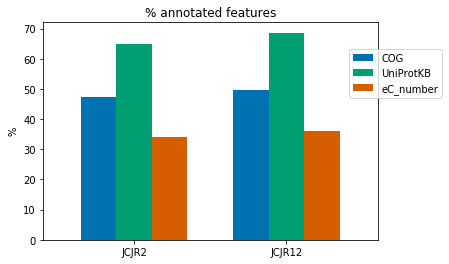

In [0]:
fig, ax = plt.subplots()
cds_comp_pro.plot(kind='bar', ax=ax, width=0.7, rot=0, title='% annotated features' );
ax.legend(loc=0, bbox_to_anchor=(0.9,0.9));
#plt.tight_layout()
plt.ylabel(r'$\%$')
fig.savefig('cds_comp.png',bbox_inches='tight')

In [0]:
import matplotlib

In [0]:
matplotlib.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

In [0]:
matplotlib.style.use('tableau-colorblind10')

In [0]:
matplotlib.style.reload_library()

In [0]:
JCJR2_df[(JCJR2_df['seqid'] == 'contig_27') & (JCJR2_df['start'] > 8000)]

,seqid,source,type,start,end,score,strand,phase,attributes
3241,contig_27,FIG,CDS,8236,8436,.,+,1,ID=fig|6666666.367937.peg.3242;Name=hypothetical protein
3242,contig_27,FIG,CDS,8531,9856,.,+,2,ID=fig|6666666.367937.peg.3243;Name=Dicarboxylate MFS transporter
3243,contig_27,FIG,CDS,9948,10061,.,+,0,ID=fig|6666666.367937.peg.3244;Name=hypothetical protein
3244,contig_27,FIG,CDS,10260,10580,.,-,0,ID=fig|6666666.367937.peg.3245;Name=hypothetical protein
3245,contig_27,FIG,CDS,10753,11376,.,+,1,ID=fig|6666666.367937.peg.3246;Name=Flavin reductase-like%2C FMN-binding domain protein
3246,contig_27,FIG,CDS,11391,11630,.,-,0,ID=fig|6666666.367937.peg.3247;Name=hypothetical protein
3247,contig_27,FIG,CDS,11695,12036,.,-,1,ID=fig|6666666.367937.peg.3248;Name=hypothetical protein
3248,contig_27,FIG,CDS,12360,13289,.,+,0,ID=fig|6666666.367937.peg.3249;Name=Transcriptional regulator%2C AraC family
3249,contig_27,FIG,CDS,13302,14357,.,-,0,ID=fig|6666666.367937.peg.3250;Name=Spermidine Putrescine transport ATP-binding protein potA
3250,contig_27,FIG,CDS,14381,15238,.,-,2,ID=fig|6666666.367937.peg.3251;Name=ABC transporter%2C permease protein 2 (cluster 1%2C maltose/g3p/polyamine/iron)


In [0]:
JCJR12_df_pro[(JCJR12_df_pro['seqid'] == 'contig7') & (JCJR12_df_pro['start'] > 293000)]

,seqid,source,type,start,end,score,strand,phase,attributes
4440,contig7,Prodigal:2.6,CDS,293477.0,294526.0,.,-,0,"ID=DPKEDGCG_04441;eC_number=1.-.-.-;Name=nemA_4;dbxref=COG:COG1902;gene=nemA_4;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P77258;locus_tag=DPKEDGCG_04441;product=N-ethylmaleimide reductase"
4441,contig7,Prodigal:2.6,CDS,294550.0,295716.0,.,-,0,"ID=DPKEDGCG_04442;Name=ydhP_2;dbxref=COG:COG2814;gene=ydhP_2;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P77389;locus_tag=DPKEDGCG_04442;product=Inner membrane transport protein YdhP"
4442,contig7,Prodigal:2.6,CDS,295720.0,296040.0,.,-,0,"ID=DPKEDGCG_04443;Name=sdpR;dbxref=COG:COG0640;gene=sdpR;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:O32242;locus_tag=DPKEDGCG_04443;product=Transcriptional repressor SdpR"
4443,contig7,Prodigal:2.6,CDS,296212.0,296790.0,.,+,0,"ID=DPKEDGCG_04444;eC_number=3.1.4.14;Name=acpH;dbxref=COG:COG3124;gene=acpH;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P21515;locus_tag=DPKEDGCG_04444;product=Acyl carrier protein phosphodiesterase"
4444,contig7,Prodigal:2.6,CDS,296916.0,297707.0,.,-,0,ID=DPKEDGCG_04445;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_04445;product=hypothetical protein
4445,contig7,Prodigal:2.6,CDS,297707.0,298462.0,.,-,0,ID=DPKEDGCG_04446;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_04446;product=hypothetical protein
4446,contig7,Prodigal:2.6,CDS,298617.0,299495.0,.,+,0,ID=DPKEDGCG_04447;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_04447;product=hypothetical protein
4447,contig7,Prodigal:2.6,CDS,299668.0,300762.0,.,+,0,"ID=DPKEDGCG_04448;eC_number=3.5.1.46;Name=nylB';gene=nylB';inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P07062;locus_tag=DPKEDGCG_04448;product=6-aminohexanoate-dimer hydrolase"
4448,contig7,Prodigal:2.6,CDS,300759.0,301088.0,.,+,0,ID=DPKEDGCG_04449;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_04449;product=hypothetical protein
4449,contig7,Prodigal:2.6,CDS,301194.0,301784.0,.,+,0,ID=DPKEDGCG_04450;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_04450;product=hypothetical protein


In [0]:
JCJR12_df_pro

,seqid,source,type,start,end,score,strand,phase,attributes
0,contig1,Prodigal:2.6,CDS,21.0,1322.0,.,+,0,"ID=DPKEDGCG_00001;eC_number=6.2.1.1;Name=acs_1;dbxref=COG:COG0365;gene=acs_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P27550;locus_tag=DPKEDGCG_00001;product=Acetyl-coenzyme A synthetase"
1,contig1,Prodigal:2.6,CDS,2022.0,2795.0,.,+,0,"ID=DPKEDGCG_00002;Name=argT_1;dbxref=COG:COG0834;gene=argT_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P02911;locus_tag=DPKEDGCG_00002;product=Lysine/arginine/ornithine-binding periplasmic protein"
2,contig1,Prodigal:2.6,CDS,2887.0,3576.0,.,+,0,"ID=DPKEDGCG_00003;Name=hisQ_1;dbxref=COG:COG4215;gene=hisQ_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P0A2I9;locus_tag=DPKEDGCG_00003;product=Histidine transport system permease protein HisQ"
3,contig1,Prodigal:2.6,CDS,3573.0,4271.0,.,+,0,"ID=DPKEDGCG_00004;Name=occM_1;gene=occM_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P35114;locus_tag=DPKEDGCG_00004;product=Octopine transport system permease protein OccM"
4,contig1,Prodigal:2.6,CDS,4273.0,5385.0,.,+,0,ID=DPKEDGCG_00005;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_00005;product=hypothetical protein
5,contig1,Prodigal:2.6,CDS,5413.0,6177.0,.,+,0,"ID=DPKEDGCG_00006;Name=hisP_1;dbxref=COG:COG4598;gene=hisP_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P02915;locus_tag=DPKEDGCG_00006;product=Histidine transport ATP-binding protein HisP"
6,contig1,Prodigal:2.6,CDS,6425.0,7405.0,.,+,0,"ID=DPKEDGCG_00007;Name=cdhR_1;dbxref=COG:COG4977;gene=cdhR_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:Q9HTH5;locus_tag=DPKEDGCG_00007;product=HTH-type transcriptional regulator CdhR"
7,contig1,Prodigal:2.6,CDS,7408.0,12273.0,.,-,0,ID=DPKEDGCG_00008;inference=ab initio prediction:Prodigal:2.6;locus_tag=DPKEDGCG_00008;product=hypothetical protein
8,contig1,Prodigal:2.6,CDS,12560.0,13780.0,.,+,0,"ID=DPKEDGCG_00009;eC_number=2.6.1.11;Name=aruC_1;dbxref=COG:COG4992;gene=aruC_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:O30508;locus_tag=DPKEDGCG_00009;product=Succinylornithine transaminase/acetylornithine aminotransferase"
9,contig1,Prodigal:2.6,CDS,13983.0,15002.0,.,+,0,"ID=DPKEDGCG_00010;eC_number=2.3.1.109;Name=astA_1;dbxref=COG:COG3138;gene=astA_1;inference=ab initio prediction:Prodigal:2.6,similar to AA sequence:UniProtKB:P80357;locus_tag=DPKEDGCG_00010;product=Arginine N-succinyltransferase subunit alpha"


In [0]:
#cds_comp_pro=CDS_composition(jcjr2_prokka_gff, jcjr12_prokka_gff, ec_number_string="eC_number", specie1="JCJR2", specie2="JCJR12")

Most_common_products(JCJR2_path,n=20, name_to_replace='Name=')

[('hypothetical protein', 1534),
 ('Transcriptional regulator%2C LysR family', 64),
 ('Uncharacterized MFS-type transporter', 51),
 ('putative lipoprotein', 39),
 ('Transcriptional regulator%2C AraC family', 36),
 ('Mobile element protein', 36),
 ('putative membrane protein', 33),
 ('Methyl-accepting chemotaxis sensor/transducer protein', 30),
 ('Transcriptional regulator%2C AcrR family', 26),
 ('Acetyltransferase%2C GNAT family', 17),
 ('Two-component transcriptional response regulator%2C LuxR family', 17),
 ('tRNA-Met-CAT', 15),
 ('Oxidoreductase%2C short-chain dehydrogenase/reductase family', 14),
 ('ABC transporter%2C permease protein (cluster 3%2C basic '
  'aa/glutamine/opines)',
  13),
 ('Sensor histidine kinase', 13),
 ('D-3-phosphoglycerate dehydrogenase (EC 1.1.1.95)', 13),
 ('Transcriptional regulator%2C GntR family', 12),
 ('tRNA-Glu-TTC', 12),
 ('SAM-dependent methyltransferase', 11),
 ('Putative transmembrane protein', 11)]


Counter({'hypothetical protein': 1534,
         'Methyl-accepting chemotaxis sensor/transducer protein': 30,
         'Uncharacterized methyltransferase PA1407': 1,
         'Auxin efflux carrier family protein': 2,
         'Selenide%2Cwater dikinase (EC 2.7.9.3)': 1,
         'Selenophosphate-dependent tRNA 2-selenouridine synthase': 1,
         'UPF0718 membrane protein YraQ': 1,
         'Phosphate ABC transporter%2C periplasmic phosphate-binding protein PstS (TC 3.A.1.7.1)': 3,
         'Pyruvate kinase family protein': 1,
         'putative membrane protein': 33,
         'Protease subunit of ATP-dependent Clp proteases': 1,
         'Peptidylprolyl isomerase%2C FKBP-type (EC 5.2.1.8)': 2,
         'Alcohol dehydrogenase%2C zinc-containing': 2,
         'Putative oxidoreductase': 9,
         'FIG00958124: hypothetical protein': 1,
         'TonB-dependent receptor': 2,
         '2%2C3-butanediol dehydrogenase%2C S-alcohol forming%2C (S)-acetoin-specific (EC 1.1.1.76)': 1,
       

In [0]:
Most_common_products(JCJR12_path,n=20, name_to_replace='Name=')

[('hypothetical protein', 1569),
 ('Transcriptional regulator%2C LysR family', 75),
 ('putative lipoprotein', 46),
 ('Uncharacterized MFS-type transporter', 45),
 ('putative membrane protein', 42),
 ('Transcriptional regulator%2C AraC family', 40),
 ('Mobile element protein', 36),
 ('Two-component transcriptional response regulator%2C LuxR family', 28),
 ('Methyl-accepting chemotaxis sensor/transducer protein', 27),
 ('Transcriptional regulator%2C AcrR family', 21),
 ('Sensory box/GGDEF family protein', 18),
 ('Acetyltransferase%2C GNAT family', 16),
 ('Putative transmembrane protein', 15),
 ('Transcriptional regulator%2C GntR family', 15),
 ('tRNA-Met-CAT', 15),
 ('Permease of the drug/metabolite transporter (DMT) superfamily', 14),
 ('Sensor histidine kinase', 14),
 ('3-oxoacyl-[acyl-carrier protein] reductase (EC 1.1.1.100)', 14),
 ('Aldehyde dehydrogenase (EC 1.2.1.3)', 12),
 ('tRNA-Glu-TTC', 12)]


Counter({'hypothetical protein': 1569,
         'Phosphodiesterase/alkaline phosphatase D': 2,
         'Multi antimicrobial extrusion protein (Na(+)/drug antiporter)%2C MATE family of MDR efflux pumps': 2,
         'Mobile element protein': 36,
         'Deoxyguanosinetriphosphate triphosphohydrolase (EC 3.1.5.1)': 1,
         'SSU ribosomal protein S8p (S15Ae)': 2,
         'Xylulose-5-phosphate phosphoketolase (EC 4.1.2.9) @ Fructose-6-phosphate phosphoketolase (EC 4.1.2.22)': 3,
         'ISPpu14%2C transposase Orf2': 3,
         'Methyl-accepting chemotaxis sensor/transducer protein': 27,
         'Threonine dehydrogenase and related Zn-dependent dehydrogenases': 1,
         'ISPsy6%2C transposase': 2,
         'Nucleoside-diphosphate-sugar epimerases': 2,
         'Isoquinoline 1-oxidoreductase beta subunit (EC 1.3.99.16)': 3,
         'Transcriptional regulator': 11,
         'Lactoylglutathione lyase (EC 4.4.1.5)': 2,
         'Bifunctional protein: zinc-containing alcohol dehy

In [0]:
JCJR2_df

,seqid,source,type,start,end,score,strand,phase,attributes
0,contig_1,FIG,CDS,1,63,.,-,1,ID=fig|6666666.367937.peg.1;Name=hypothetical protein
1,contig_1,FIG,CDS,785,2413,.,+,2,ID=fig|6666666.367937.peg.2;Name=hypothetical protein
2,contig_1,FIG,CDS,2425,4047,.,-,1,ID=fig|6666666.367937.peg.3;Name=Methyl-accepting chemotaxis sensor/transducer protein
3,contig_1,FIG,CDS,4324,5280,.,-,1,ID=fig|6666666.367937.peg.4;Name=Uncharacterized methyltransferase PA1407
4,contig_1,FIG,CDS,5342,6271,.,-,2,ID=fig|6666666.367937.peg.5;Name=Auxin efflux carrier family protein
5,contig_1,FIG,CDS,6525,7559,.,+,0,ID=fig|6666666.367937.peg.6;Name=Selenide%2Cwater dikinase (EC 2.7.9.3);Ontology_term=KEGG_ENZYME:2.7.9.3
6,contig_1,FIG,CDS,7559,8665,.,+,2,ID=fig|6666666.367937.peg.7;Name=Selenophosphate-dependent tRNA 2-selenouridine synthase
7,contig_1,FIG,CDS,8684,9739,.,-,2,ID=fig|6666666.367937.peg.8;Name=UPF0718 membrane protein YraQ
8,contig_1,FIG,CDS,9841,10923,.,-,1,ID=fig|6666666.367937.peg.9;Name=Phosphate ABC transporter%2C periplasmic phosphate-binding protein PstS (TC 3.A.1.7.1)
9,contig_1,FIG,CDS,11207,13084,.,+,2,ID=fig|6666666.367937.peg.10;Name=Pyruvate kinase family protein


In [0]:
Type_counts(JCJR2_path,JCJR12_path,specie1="JCJR12", specie2="JCJR2")

,JCJR12,JCJR2
CDS,6110,6568
RNA,15,12
tRNA,174,183
